In [2]:
# id:7-7-7 
import pandas as pd
df = pd.read_csv("week3.csv")
print(df.head())

     X1    X2         Y
0 -0.37  0.04  0.358423
1  0.64  0.15  0.507943
2  0.74 -0.75 -0.619592
3 -0.39  0.11  0.187243
4  0.86 -0.53  0.250707


### (i)(a)

In [11]:
import numpy as np
X_1 = df.iloc[:,0]
X_2 = df.iloc[:,1]
y = df.iloc[:,2]

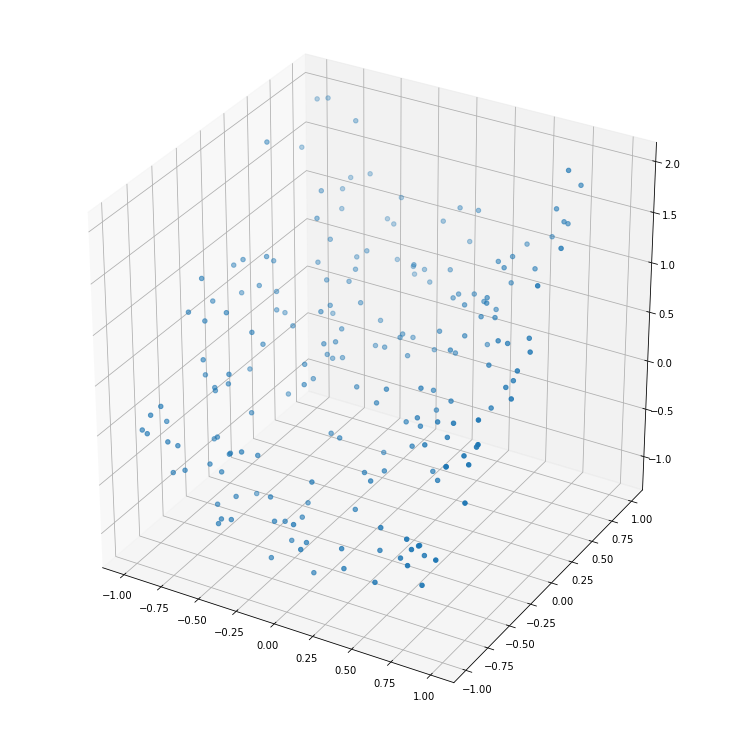

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111,projection='3d')
ax = Axes3D(fig)
ax.scatter(X_1,X_2,y)

It looks like that the training data lies on a curve

### (i)(b)

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso as lasso
poly = PolynomialFeatures(degree=5)
X1_train = df.iloc[:,0]
X2_train = df.iloc[:,1]
X_train = np.column_stack((X1_train,X2_train))
X_poly = poly.fit_transform(X_train)
y_train = y

#### C=1

In [152]:
C = 1
alpha = 1 / (2 * C)
clf_1 = lasso(alpha=alpha)
clf_1.fit(X_poly,y_train)
coef = clf_1.coef_
intercept = clf_1.intercept_
print('coef,intercept:',coef,intercept)

coef,intercept: [ 0. -0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0.  0. -0.
  0. -0.  0.] 0.3210952785527638


#### C=10

In [34]:
C = 10
alpha = 1 / (2 * C)
clf_2 = lasso(alpha=alpha)
clf_2.fit(X_poly,y_train)
coef = clf_2.coef_
intercept = clf_2.intercept_
print('coef,intercept:',coef,intercept)

coef,intercept: [ 0.         -0.          0.80826725  0.38568564  0.         -0.
 -0.          0.         -0.          0.          0.          0.
  0.          0.          0.         -0.          0.         -0.
  0.         -0.          0.        ] 0.21114642886905055


#### C=1000

In [36]:
C = 1000
alpha = 1 / (2 * C)
clf_3 = lasso(alpha=alpha)
clf_3.fit(X_poly,y_train)
coef = clf_3.coef_
intercept = clf_3.intercept_
print('coef,intercept:',coef,intercept)

coef,intercept: [ 0.          0.0126105   0.95819184  1.00262156  0.04493978  0.
 -0.01916403  0.08064115  0.          0.          0.03969766  0.
 -0.          0.04994839  0.         -0.          0.          0.07961745
  0.10054975 -0.06945002 -0.        ] -0.00555749698122926


The smaller the C is,the larger the alpha is.Thus,the parameters of the trained models is sparser because of the penalty.

### (i)(c)

In [120]:
Xtest = []
grid = np.linspace(-5,5)
for i in grid:
    for j in grid:
        Xtest.append([i,j])
Xtest = np.array(Xtest)
Xtest_tr = poly.fit_transform(Xtest)
print(Xtest_tr)

[[ 1.00000000e+00 -5.00000000e+00 -5.00000000e+00 ... -3.12500000e+03
  -3.12500000e+03 -3.12500000e+03]
 [ 1.00000000e+00 -5.00000000e+00 -4.79591837e+00 ... -2.75775293e+03
  -2.64519159e+03 -2.53722459e+03]
 [ 1.00000000e+00 -5.00000000e+00 -4.59183673e+00 ... -2.42046787e+03
  -2.22287866e+03 -2.04141918e+03]
 ...
 [ 1.00000000e+00  5.00000000e+00  4.59183673e+00 ...  2.42046787e+03
   2.22287866e+03  2.04141918e+03]
 [ 1.00000000e+00  5.00000000e+00  4.79591837e+00 ...  2.75775293e+03
   2.64519159e+03  2.53722459e+03]
 [ 1.00000000e+00  5.00000000e+00  5.00000000e+00 ...  3.12500000e+03
   3.12500000e+03  3.12500000e+03]]


In [114]:
# C = 1
predictions_1 = clf_1.predict(Xtest_tr)
predictions_1

array([0.32109528, 0.32109528, 0.32109528, ..., 0.32109528, 0.32109528,
       0.32109528])

In [143]:
# C = 10
predictions_2 = clf_2.predict(Xtest_tr)
predictions_2

array([ 5.81195104,  5.97690354,  6.14185604, ..., 13.56471858,
       13.72967108, 13.89462358])

In [99]:
# C = 1000
predictions_3 = clf_3.predict(Xtest_tr)
predictions_3

array([-276.31761401, -255.92519368, -235.08207589, ...,  385.24707111,
        412.92064127,  440.74213555])

In [125]:
X1 = Xtest[:,0].reshape(50,50)
X1

array([[-5.        , -5.        , -5.        , ..., -5.        ,
        -5.        , -5.        ],
       [-4.79591837, -4.79591837, -4.79591837, ..., -4.79591837,
        -4.79591837, -4.79591837],
       [-4.59183673, -4.59183673, -4.59183673, ..., -4.59183673,
        -4.59183673, -4.59183673],
       ...,
       [ 4.59183673,  4.59183673,  4.59183673, ...,  4.59183673,
         4.59183673,  4.59183673],
       [ 4.79591837,  4.79591837,  4.79591837, ...,  4.79591837,
         4.79591837,  4.79591837],
       [ 5.        ,  5.        ,  5.        , ...,  5.        ,
         5.        ,  5.        ]])

In [131]:
X2 = Xtest[:,1].reshape(50,50)
X2

array([[-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ],
       [-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ],
       [-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ],
       ...,
       [-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ],
       [-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ],
       [-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ]])

In [130]:
predictions_1 = predictions_1.reshape(50,50)
predictions_1

array([[0.32109528, 0.32109528, 0.32109528, ..., 0.32109528, 0.32109528,
        0.32109528],
       [0.32109528, 0.32109528, 0.32109528, ..., 0.32109528, 0.32109528,
        0.32109528],
       [0.32109528, 0.32109528, 0.32109528, ..., 0.32109528, 0.32109528,
        0.32109528],
       ...,
       [0.32109528, 0.32109528, 0.32109528, ..., 0.32109528, 0.32109528,
        0.32109528],
       [0.32109528, 0.32109528, 0.32109528, ..., 0.32109528, 0.32109528,
        0.32109528],
       [0.32109528, 0.32109528, 0.32109528, ..., 0.32109528, 0.32109528,
        0.32109528]])

In [ ]:
ax.plot_surface(X1,X2,predictions_1,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
plt.show()

In [145]:
predictions_2 = predictions_2.reshape(50,50)
predictions_2

array([[ 5.81195104,  5.97690354,  6.14185604, ..., 13.56471858,
        13.72967108, 13.89462358],
       [ 5.04090104,  5.20585354,  5.37080604, ..., 12.79366858,
        12.95862108, 13.12357358],
       [ 4.30197813,  4.46693063,  4.63188313, ..., 12.05474566,
        12.21969816, 12.38465066],
       ...,
       [ 4.30197813,  4.46693063,  4.63188313, ..., 12.05474566,
        12.21969816, 12.38465066],
       [ 5.04090104,  5.20585354,  5.37080604, ..., 12.79366858,
        12.95862108, 13.12357358],
       [ 5.81195104,  5.97690354,  6.14185604, ..., 13.56471858,
        13.72967108, 13.89462358]])

In [ ]:
ax.plot_surface(X1,X2,predictions_2,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
plt.show()

In [149]:
predictions_3 = predictions_3.reshape(50,50)
predictions_3

array([[-276.31761401, -255.92519368, -235.08207589, ...,  228.56413583,
         269.93239203,  317.17806863],
       [-237.41657051, -220.83639285, -203.64237954, ...,  221.65719171,
         261.46357557,  306.85312473],
       [-201.41859719, -188.3354935 , -174.4934024 , ...,  214.1430584 ,
         252.31912808,  295.78619768],
       ...,
       [-277.62187305, -227.33218451, -182.88325041, ...,  298.36679656,
         318.48175208,  338.38747471],
       [-280.78118468, -228.26578907, -181.90774682, ...,  340.12156999,
         363.86724169,  387.5732658 ],
       [-282.11850467, -227.44375412, -179.24504555, ...,  385.24707111,
         412.92064127,  440.74213555]])

In [ ]:
ax.plot_surface(X1,X2,predictions_3,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
plt.show()

### (i)(d)

Underfitting:When a machine learning model is not complex enough to accurately capture relationships between a dataset’s features and a target variable.
Overfitting:The production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably.
As C is increasing,that is alpha is decreasing,the model tends to overfit.On the contrary,as C is decreasing,the model tends to underfit.
Selecting a proper C which is not too large or too small will avoid underfitting or overfitting.

### (i)(e)

In [156]:
from sklearn.linear_model import Ridge as ridge

#### C=1

In [158]:
C = 1
alpha = 1 / (2 * C)
clf_1 = ridge(alpha=alpha)
clf_1.fit(X_poly,y_train)
coef = clf_1.coef_
intercept = clf_1.intercept_
print('coef,intercept:',coef,intercept)

coef,intercept: [ 0.          0.02551827  0.87710401  0.77140119  0.02670642 -0.02010531
 -0.12571825  0.14213113  0.08094757  0.18468222  0.26233718  0.05555045
  0.07432048  0.0570865   0.00203639  0.08893026  0.02545202  0.15968788
  0.05905568 -0.18223554 -0.11759007] 0.029378685593369036


#### C=10

In [159]:
C = 10
alpha = 1 / (2 * C)
clf_2 = ridge(alpha=alpha)
clf_2.fit(X_poly,y_train)
coef = clf_2.coef_
intercept = clf_2.intercept_
print('coef,intercept:',coef,intercept)

coef,intercept: [ 0.          0.08934363  0.90309281  0.92886809 -0.00195507 -0.01532612
 -0.42200628  0.08301791  0.22797801  0.23197296  0.13138392  0.11262494
  0.04702241  0.06855935  0.02377285  0.31115043  0.06362232  0.30546748
  0.11516138 -0.44084583 -0.21834833] 0.0005978057955284277


#### C=1000

In [160]:
C = 1000
alpha = 1 / (2 * C)
clf_3 = lasso(alpha=alpha)
clf_3.fit(X_poly,y_train)
coef = clf_3.coef_
intercept = clf_3.intercept_
print('coef,intercept:',coef,intercept)

coef,intercept: [ 0.          0.0126105   0.95819184  1.00262156  0.04493978  0.
 -0.01916403  0.08064115  0.          0.          0.03969766  0.
 -0.          0.04994839  0.         -0.          0.          0.07961745
  0.10054975 -0.06945002 -0.        ] -0.00555749698122926


In [162]:
# C = 1
predictions_1 = clf_1.predict(Xtest_tr)
predictions_1

array([157.72961345,  60.93395613, -17.73782704, ..., 583.8695575 ,
       523.17462598, 445.39301426])

In [163]:
# C = 10
predictions_2 = clf_2.predict(Xtest_tr)
predictions_2

array([-183.33836315, -402.67001348, -582.7967366 , ..., 1059.11322887,
        902.43984856,  708.12323565])

In [164]:
# C = 1000
predictions_3 = clf_3.predict(Xtest_tr)
predictions_3

array([-276.31761401, -255.92519368, -235.08207589, ...,  385.24707111,
        412.92064127,  440.74213555])

In [166]:
predictions_1 = predictions_1.reshape(50,50)
predictions_1

array([[ 157.72961345,   60.93395613,  -17.73782704, ..., -109.68268904,
        -105.08334174, -100.69227933],
       [ 236.36857417,  136.76422034,   55.1680124 , ...,  -74.87782896,
         -71.00293236,  -67.70711393],
       [ 303.62578753,  201.70378904,  117.65288632, ...,  -47.35623293,
         -44.4456639 ,  -42.49449696],
       ...,
       [ 267.69061288,  273.01242922,  278.96987705, ...,  316.51579626,
         248.05469724,  162.65537139],
       [ 336.83218763,  343.57974687,  350.57840989, ...,  441.46505772,
         376.62672975,  294.76477164],
       [ 419.55188342,  427.47819914,  435.28165289, ...,  583.8695575 ,
         523.17462598,  445.39301426]])

In [168]:
ax.plot_surface(X1,X2,predictions_1,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
plt.show()

In [170]:
predictions_2 = predictions_2.reshape(50,50)
predictions_2

array([[-183.33836315, -402.67001348, -582.7967366 , ..., -674.91444522,
        -624.90646426, -569.22125844],
       [  83.7826591 , -139.91012383, -324.80355346, ..., -501.19554844,
        -454.14007229, -402.33125227],
       [ 311.10983797,   84.04406785, -104.66958873, ..., -357.93567335,
        -314.27400025, -266.80153658],
       ...,
       [ 313.66070302,  366.36384162,  415.21094921, ...,  483.9805261 ,
         315.96459018,  111.06049059],
       [ 460.75946545,  518.46985677,  571.36313476, ...,  750.32671041,
         587.47376156,  387.33395538],
       [ 641.24091529,  703.53802107,  760.07625605, ..., 1059.11322887,
         902.43984856,  708.12323565]])

In [171]:
ax.plot_surface(X1,X2,predictions_2,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
plt.show()

In [173]:
predictions_3 = predictions_3.reshape(50,50)
predictions_3

array([[-276.31761401, -255.92519368, -235.08207589, ...,  228.56413583,
         269.93239203,  317.17806863],
       [-237.41657051, -220.83639285, -203.64237954, ...,  221.65719171,
         261.46357557,  306.85312473],
       [-201.41859719, -188.3354935 , -174.4934024 , ...,  214.1430584 ,
         252.31912808,  295.78619768],
       ...,
       [-277.62187305, -227.33218451, -182.88325041, ...,  298.36679656,
         318.48175208,  338.38747471],
       [-280.78118468, -228.26578907, -181.90774682, ...,  340.12156999,
         363.86724169,  387.5732658 ],
       [-282.11850467, -227.44375412, -179.24504555, ...,  385.24707111,
         412.92064127,  440.74213555]])

In [174]:
ax.plot_surface(X1,X2,predictions_3,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
plt.show()

Comparing to Lasso Regression,increasing alpha of Ridge Regression will not make the parameters sparser.

### （ii）(a)

In [224]:
loss = []
var = []

#### 5-fold

In [209]:
from sklearn.linear_model import LassoCV as lassocv
C = 1
alpha = 1 / (2 * C)
clf = lassocv(alphas=[alpha,])
clf.fit(X_poly,y_train)
# 5 estimates for the model mean square prediction error
clf.mse_path_

array([0.43612501, 0.52233729, 0.35313141, 0.45634332, 0.39192874])

In [210]:
loss_5,var_5 = np.mean(clf.mse_path_),np.var(clf.mse_path_)
print('mean of error:',loss_5,'variance of error:',var_2)

mean of error: 0.431973154172522 variance of error: 0.0033192792339642382


#### 2-fold

In [211]:
clf = lassocv(alphas=[alpha,],cv=2)
clf.fit(X_poly,y_train)
# 2 estimates for the model mean square prediction error
clf.mse_path_

array([0.45862797, 0.40988463])

In [212]:
loss_2, var_2 = np.mean(clf.mse_path_),np.var(clf.mse_path_)
print('mean of error:',loss_2,'variance of error:',var_2)

mean of error: 0.43425630269866694 variance of error: 0.000593978319210598


#### 10-fold

In [213]:
clf = lassocv(alphas=[alpha,],cv=10)
clf.fit(X_poly,y_train)
# 10 estimates for the model mean square prediction error
clf.mse_path_

array([0.4695767 , 0.41110207, 0.62696955, 0.41828732, 0.37372926,
       0.35150204, 0.48872774, 0.42670024, 0.41656702, 0.36621343])

In [214]:
loss_10, var_10 = np.mean(clf.mse_path_),np.var(clf.mse_path_)
print('mean of error:',loss_10,'variance of error:',var_10)

mean of error: 0.4349375372744115 variance of error: 0.005765118023545844


#### 25-fold

In [215]:
clf = lassocv(alphas=[alpha,],cv=25)
clf.fit(X_poly,y_train)
# 25 estimates for the model mean square prediction error
clf.mse_path_

array([0.27455075, 0.78490148, 0.22710863, 0.33709963, 0.59414149,
       0.96014683, 0.38237045, 0.56473579, 0.38385588, 0.34256862,
       0.27989593, 0.40665502, 0.5810721 , 0.43755358, 0.08627129,
       0.39763639, 0.70297715, 0.29476512, 0.58942615, 0.33189268,
       0.51394649, 0.42453756, 0.22862448, 0.12597081, 0.70441613])

In [216]:
loss_25, var_25 = np.mean(clf.mse_path_),np.var(clf.mse_path_)
print('mean of error:',loss_25,'variance of error:',var_25)

mean of error: 0.43828481762531346 variance of error: 0.04179037687018541


#### 50-fold

In [217]:
clf = lassocv(alphas=[alpha,],cv=50)
clf.fit(X_poly,y_train)
# 50 estimates for the model mean square prediction error
clf.mse_path_

array([0.23665186, 0.30547669, 0.58964541, 0.94968639, 0.29552534,
       0.1553697 , 0.1283337 , 0.54840965, 0.87369548, 0.31077513,
       1.02339587, 0.88062798, 0.44644564, 0.32859059, 0.46582563,
       0.66367266, 0.34545345, 0.41518129, 0.38654732, 0.30270045,
       0.1968453 , 0.36398688, 0.13821751, 0.66452841, 0.47721197,
       0.68397449, 0.58279016, 0.30945752, 0.10169752, 0.07114395,
       0.27708347, 0.51086729, 1.12342023, 0.26322455, 0.30056865,
       0.290441  , 0.54526416, 0.62075775, 0.41068513, 0.26362187,
       0.79681749, 0.23126475, 0.26142731, 0.58792349, 0.21624141,
       0.24217063, 0.14247177, 0.10816712, 0.45327177, 1.05575521])

In [218]:
loss_50, var_50 = np.mean(clf.mse_path_),np.var(clf.mse_path_)
print('mean of error:',loss_50,'variance of error:',var_50)

mean of error: 0.4388661804761355 variance of error: 0.06961016920075157


#### 100-fold

In [219]:
clf = lassocv(alphas=[alpha,],cv=100)
clf.fit(X_poly,y_train)
# 100 estimates for the model mean square prediction error
clf.mse_path_

array([1.84090337e-02, 4.57295585e-01, 5.74970663e-01, 3.17932804e-02,
       3.59792835e-01, 7.99915060e-01, 3.97348326e-01, 1.49157640e+00,
       2.82068285e-01, 3.14241728e-01, 2.63899800e-01, 4.62993908e-02,
       1.00843401e-01, 1.59980629e-01, 1.09635708e+00, 1.98566712e-03,
       9.29092396e-01, 8.21415341e-01, 2.26144483e-01, 3.94211025e-01,
       7.62974160e-01, 1.27266858e+00, 6.31027532e-01, 1.13230729e+00,
       6.03135288e-01, 2.79569507e-01, 4.99584129e-01, 1.61633826e-01,
       4.96736194e-01, 4.44622355e-01, 5.54120098e-01, 7.68111508e-01,
       3.00872519e-01, 3.92098096e-01, 6.10228484e-02, 7.66303636e-01,
       6.09630768e-01, 1.54930249e-01, 2.56546322e-01, 3.49800138e-01,
       1.28303591e-01, 2.63804220e-01, 3.06795818e-02, 6.99182915e-01,
       2.13984950e-01, 6.13554820e-02, 1.17656311e+00, 1.44488331e-01,
       5.90337282e-02, 8.95489877e-01, 7.46692417e-01, 6.00629100e-01,
       6.85214789e-01, 4.61687766e-01, 5.81372098e-01, 3.65087270e-02,
      

In [220]:
loss_100, var_100 = np.mean(clf.mse_path_),np.var(clf.mse_path_)
print('mean of error:',loss_100,'variance of error:',var_100)

mean of error: 0.4454423628953019 variance of error: 0.15980671184062228


In [229]:
loss = [loss_2,loss_5,loss_10,loss_25,loss_50,loss_100]
loss

[0.43425630269866694,
 0.431973154172522,
 0.4349375372744115,
 0.43828481762531346,
 0.4388661804761355,
 0.4454423628953019]

In [231]:
var = [var_2,var_5,var_10,var_25,var_50,var_100]
var

[0.000593978319210598,
 0.0033192792339642382,
 0.005765118023545844,
 0.04179037687018541,
 0.06961016920075157,
 0.15980671184062228]

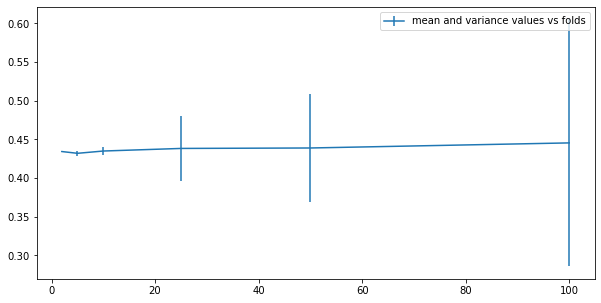

In [244]:
folds = [2,5,10,25,50,100]
plt.figure(figsize=(10,5))
plt.errorbar(folds,loss,yerr=var,label='mean and variance values vs folds')
plt.legend()

The plot above shows that 5-fold has the minimum mean error while the 2-fold has the minimum variance.It is obvious that 100-fold has the maximum mean error and maximum variance at the same time.When comparing 2-fold and 5-fold,we find that little more folds will lead to less error but more error variance which we can choose from based on our requirements.Too large number of folds is not within the scope of consideration.I will recommend using 5-fold because it has minimum error and relatively small variance.

### (ii)(b)

I choose the range of values of C from 1 to 1000 because we can choose from a wide range.

In [255]:
C = [1,10,100,1000]
C = np.array(C)
alphas = 1 / (2 * C)
clf = lassocv(alphas=alphas,cv=5)
clf.fit(X_poly,y_train)
# 5 estimates for the model mean square prediction error
clf.mse_path_

array([[0.43612501, 0.52233729, 0.35313141, 0.45634332, 0.39192874],
       [0.09299013, 0.0963064 , 0.09468916, 0.07260721, 0.05983658],
       [0.0501273 , 0.04023386, 0.05024357, 0.0379519 , 0.03041094],
       [0.04835711, 0.04431671, 0.05001188, 0.04070875, 0.0364281 ]])

In [251]:
# the mean of error and variance of different C values
clf.mse_mean,clf.mse_var = np.mean(clf.mse_path_,axis=1),np.var(clf.mse_path_,axis=1)
clf.mse_mean,clf.mse_var

(array([0.43197315, 0.08328589, 0.04179352, 0.04396451]),
 array([3.31927923e-03, 2.11528936e-04, 5.75217836e-05, 2.46774157e-05]))

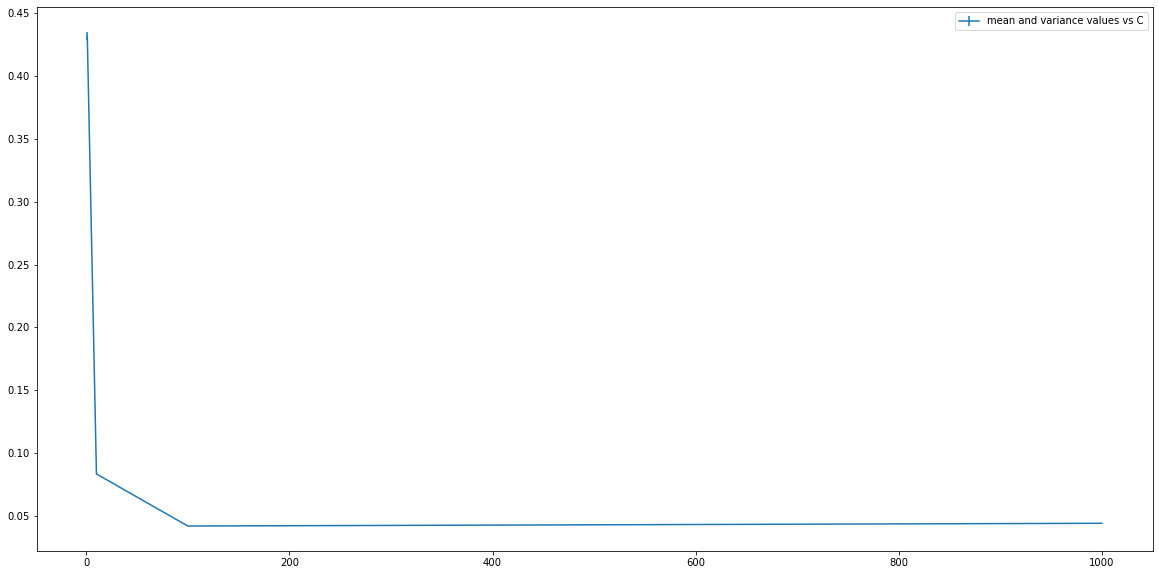

In [253]:
plt.figure(figsize=(20,10))
plt.errorbar(C,clf.mse_mean,yerr=clf.mse_var,label='mean and variance values vs C')
plt.legend()

### (ii)(c)

I would recommend 100 for C because it has minimum error and relatively small variance.

### (ii)(d)

In [ ]:
from sklearn.linear_model import RidgeCV as ridgecv
C = [1,10,100,1000]
C = np.array(C)
alphas = 1 / (2 * C)
clf = ridgecv(alphas=alphas,cv=5)
clf.fit(X_poly,y_train)
# 5 estimates for the model mean square prediction error
clf.cv_values_